# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
)
from sklearn.metrics import accuracy_score

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination


c:\Users\ezrat\anaconda3\envs\CS3263\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load in Dataset


In [2]:
def load_file(filepath):
    return pd.read_csv(filepath)

In [3]:
df = load_file("diabetes_data.csv")

# Verify datasets loaded in correctly

In [4]:
df.head(10) # Training set

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


# Data Cleaning

In [5]:
columns_to_keep = ['Age', 'Gender', 'Polyuria', 'sudden weight loss', 'visual blurring', 'Itching', 'Obesity', "class"]
df_filtered = df[columns_to_keep]

In [6]:
df_filtered

,Age,Gender,Polyuria,sudden weight loss,visual blurring,Itching,Obesity,class
0,40,Male,No,No,No,Yes,Yes,Positive
1,58,Male,No,No,Yes,No,No,Positive
2,41,Male,Yes,No,No,Yes,No,Positive
3,45,Male,No,Yes,No,Yes,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,No,Yes,No,Positive
516,48,Female,Yes,Yes,No,Yes,No,Positive
517,58,Female,Yes,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,Yes,Yes,No,Negative


# Data Visualisation

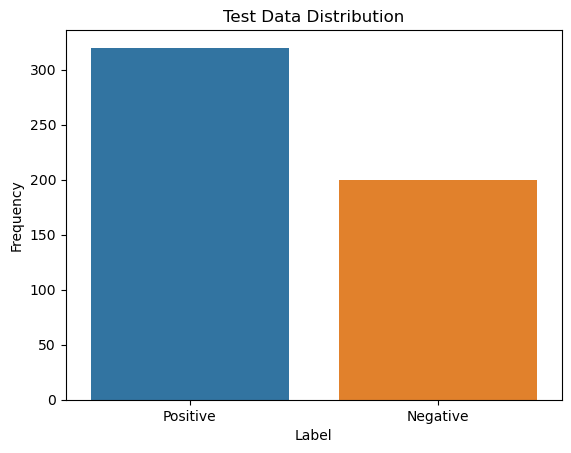

class
Positive    320
Negative    200
Name: count, dtype: int64

In [7]:
sns.countplot(x='class', data= df_filtered)
plt.title('Test Data Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()
df_filtered["class"].value_counts()

In [8]:
df_filtered.describe(include=['object'])

,Gender,Polyuria,sudden weight loss,visual blurring,Itching,Obesity,class
count,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2
top,Male,No,No,No,No,No,Positive
freq,328,262,303,287,267,432,320


# Model Implementation

In [9]:
X = df_filtered.drop('class', axis=1) 
y = df_filtered['class']

In [10]:
X_encoded = pd.get_dummies(X, drop_first=True) # encode the categorical columns as numerical values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42) # 80-20 test split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # 80-20 validation split

# Bernoulli Naive Bayes Baseline

In [13]:
nb = BernoulliNB()

nb.fit(X_train, y_train)

y_val_pred = nb.predict(X_val)
print(classification_report(y_val, y_val_pred))

y_test_pred = nb.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.80      0.77        30
    Positive       0.88      0.85      0.87        54

    accuracy                           0.83        84
   macro avg       0.82      0.83      0.82        84
weighted avg       0.84      0.83      0.83        84

              precision    recall  f1-score   support

    Negative       0.77      0.82      0.79        33
    Positive       0.91      0.89      0.90        71

    accuracy                           0.87       104
   macro avg       0.84      0.85      0.85       104
weighted avg       0.87      0.87      0.87       104



# Logistic Regression Baseline

In [14]:
lr = LogisticRegression(max_iter = 10000)

lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)
print(classification_report(y_val, y_val_pred))

y_test_pred = lr.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.74      0.83      0.78        30
    Positive       0.90      0.83      0.87        54

    accuracy                           0.83        84
   macro avg       0.82      0.83      0.82        84
weighted avg       0.84      0.83      0.84        84

              precision    recall  f1-score   support

    Negative       0.78      0.85      0.81        33
    Positive       0.93      0.89      0.91        71

    accuracy                           0.88       104
   macro avg       0.85      0.87      0.86       104
weighted avg       0.88      0.88      0.88       104



# Implement our Bayesian Network

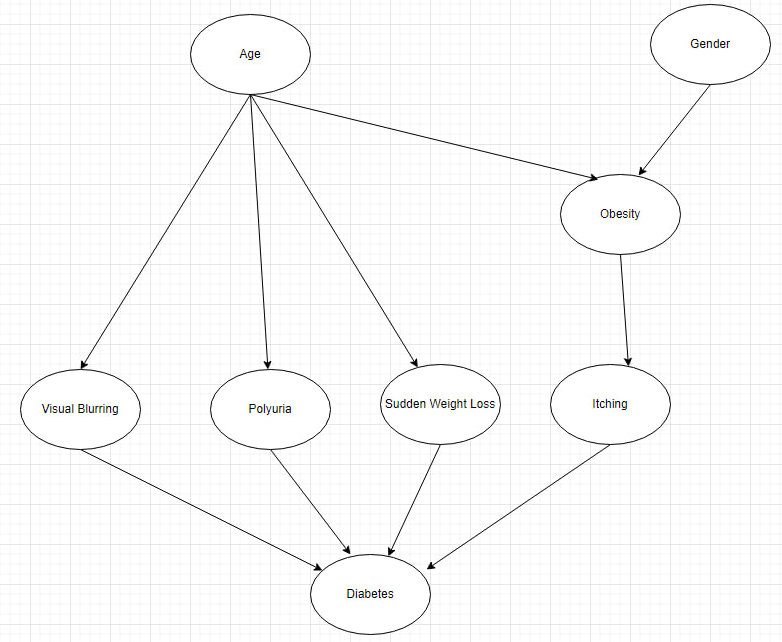

In [15]:
# model = BayesianNetwork([
#     ('Age', 'Obesity'),
#     ('Gender', 'Obesity'),
#     ('Obesity', 'Itching'),
#     ('Age', 'Visual Blurring')
#     ('Age', 'Polyuria'),
#     ('Age', 'Sudden Weight Loss')
#     ('Visual Blurring', 'Class'),
#     ('Polyuria', 'Class'),
#     ('Sudden Weight Loss', 'Class'),
#     ('Itching', 'Class')
# ])

# model.fit(df_filtered, estimator=MaximumLikelihoodEstimator)

In [20]:
# concat xtrain and ytrain
train_data = pd.concat([X_train, y_train], axis=1)

In [21]:
train_data

,Age,Gender_Male,Polyuria_Yes,sudden weight loss_Yes,visual blurring_Yes,Itching_Yes,Obesity_Yes,class
288,43,True,False,False,False,True,False,Negative
343,47,False,False,True,False,False,False,Positive
512,43,True,False,False,False,False,False,Negative
383,61,True,True,False,True,True,False,Positive
315,33,False,False,False,False,False,False,Negative
...,...,...,...,...,...,...,...,...
110,53,False,False,True,True,True,False,Positive
390,47,True,False,False,False,False,True,Negative
98,35,False,True,False,True,False,False,Positive
495,43,True,False,False,False,True,False,Negative


In [14]:
hc = HillClimbSearch(train_data)
bic_score = BicScore(train_data)

best_model_structure = hc.estimate(scoring_method=bic_score)

# Post-processing the structure to ensure 'class' is always a child node
edges_to_remove = [(parent, child) for parent, child in best_model_structure.edges() if parent == 'class']
edges_to_add = [(child, parent) for parent, child in edges_to_remove]

# Adjust the model structure
best_model_structure.remove_edges_from(edges_to_remove)
best_model_structure.add_edges_from(edges_to_add)

print("Adjusted Model Structure:")
for edge in best_model_structure.edges():
    print(edge)

  0%|          | 0/1000000 [01:19<?, ?it/s]

Adjusted Model Structure:


# Sample Prediction

In [16]:
infer = VariableElimination(model)

evidence = {
    'Age': 40, 
    'Gender':  "Male", 
    'Polyuria': "No",
    'sudden weight loss': "No",
    'visual blurring': "No",
    'Itching': "No"
}

# Query the model for the probability of Diabetes
result = infer.query(variables=['class'], evidence=evidence)
print(result)


+-----------------+--------------+
| class           |   phi(class) |
+=================+==============+
| class(Negative) |       0.6923 |
+-----------------+--------------+
| class(Positive) |       0.3077 |
+-----------------+--------------+
